**`Load Package`**

In [1]:
import os
import logging
import subprocess
import psutil
import resource
# memory_limit = 20 * 1024 * 1024 * 1024
# resource.setrlimit(resource.RLIMIT_AS, (memory_limit, memory_limit))


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, message=".*OldFormatWarning.*")

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import rcParams, colors
import seaborn as sb

import omicverse as ov
import scanpy as sc
import scanorama
import scib
import scvi

import joblib


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.10, Tutorials: https://omicverse.readthedocs.io/


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/p

In [ ]:
process = psutil.Process()
memory_in_bytes = process.memory_info().rss
memory_in_gb = memory_in_bytes / (1024 * 1024 * 1024)
print("当前内存使用情况（GB）：", memory_in_gb)


**`Load h5ad Data in scanpy`**

In [2]:
import os
import logging
import subprocess

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import rcParams, colors
import seaborn as sb

import omicverse as ov
import scanpy as sc
import scanorama
import scib
import scvi

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, message=".*OldFormatWarning.*")

In [3]:
input_file = '../Data/Immune_human_mouse/human_alldata_integration_harmony_scanorama_scVI_cca_rpca_redoscanorama.h5ad'
adata = sc.read_h5ad(input_file)
adata
print()
print(adata.X.shape)
print()
print(adata.obs.head())
print()
print(adata.var.head())


(25507, 8128)

                                batch chemistry data_type  dpt_pseudotime  \
index                                                                       
AAACCTGCAGCGAACA-1-Oetjen_A  Oetjen_A    v2_10X       UMI             NaN   
AAACCTGCATGTCCTC-1-Oetjen_A  Oetjen_A    v2_10X       UMI             NaN   
AAACCTGGTCGACTGC-1-Oetjen_A  Oetjen_A    v2_10X       UMI             NaN   
AAACCTGGTCGCTTCT-1-Oetjen_A  Oetjen_A    v2_10X       UMI             NaN   
AAACCTGTCCCGACTT-1-Oetjen_A  Oetjen_A    v2_10X       UMI             NaN   

                            final_annotation   mt_frac  n_counts  n_genes  \
index                                                                       
AAACCTGCAGCGAACA-1-Oetjen_A        Monocytes  0.047970    6379.0     1422   
AAACCTGCATGTCCTC-1-Oetjen_A     CD4+ T cells  0.024928    4172.0      814   
AAACCTGGTCGACTGC-1-Oetjen_A        Monocytes  0.051907    6608.0     1208   
AAACCTGGTCGCTTCT-1-Oetjen_A        Monocytes  0.041716    5

In [4]:
adata

AnnData object with n_obs × n_vars = 25507 × 8128
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features'
    uns: 'batch_colors', 'final_annotation_colors', 'hvg', 'log1p', 'pca', 'pca_neighbours', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap'
    obsm: 'X_cca', 'X_cca_umap', 'X_harmoney_umap', 'X_harmony', 'X_pca', 'X_pca_umap', 'X_rpca', 'X_rpca_umap', 'X_scVI', 'X_scVI_umap', 'X_scanorama', 'X_scanorama_umap', 'X_umap', 'scaled|original|X_pca'
    obsp: 'pca_neighbours_connectivities', 

## `3. Benchmark and visualization`

**`3.1 Benchmark the donors`**

In [5]:
import scib
from scib_metrics.benchmark import Benchmarker
from scib_metrics.benchmark import BioConservation, BatchCorrection

biocons = BioConservation(isolated_labels=False)
batchcor = BatchCorrection(kbet_per_label=False)
bm = Benchmarker(
    adata,
    batch_key="batch",
    label_key="final_annotation",
    embedding_obsm_keys=[
        "X_pca",
        "X_scanorama",
        "X_scVI",
        "X_harmony",
        "X_cca",
        "X_rpca"
    ],
    bio_conservation_metrics=biocons,
    batch_correction_metrics=batchcor,
    n_jobs=16
)

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [6]:
bm.benchmark()

Metrics:   0%|          | 0/10 [00:00<?, ?it/s, Bio conservation: nmi_ari_cluster_labels_kmeans]An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.

Embeddings:  17%|█▋        | 1/6 [01:11<05:57, 71.53s/it]atch correction: pcr_comparison]
                                                                                         
Embeddings:  33%|███▎      | 2/6 [01:24<02:29, 37.29s/it]atch correction: pcr_comparison]
                                                                                         
Embeddings:  50%|█████     | 3/6 [01:39<01:20, 26.73s/it]atch correction: pcr_comparison]
                                                                                         
Embeddings:  67%|██████▋   | 4/6 [02:38<01:19, 39.61s/it]atch correction: pcr_comparison]
                                                                                         
Embeddings:  83%|████████▎ | 5/6 [03:42<00:48, 48.35s/it]atch correction

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


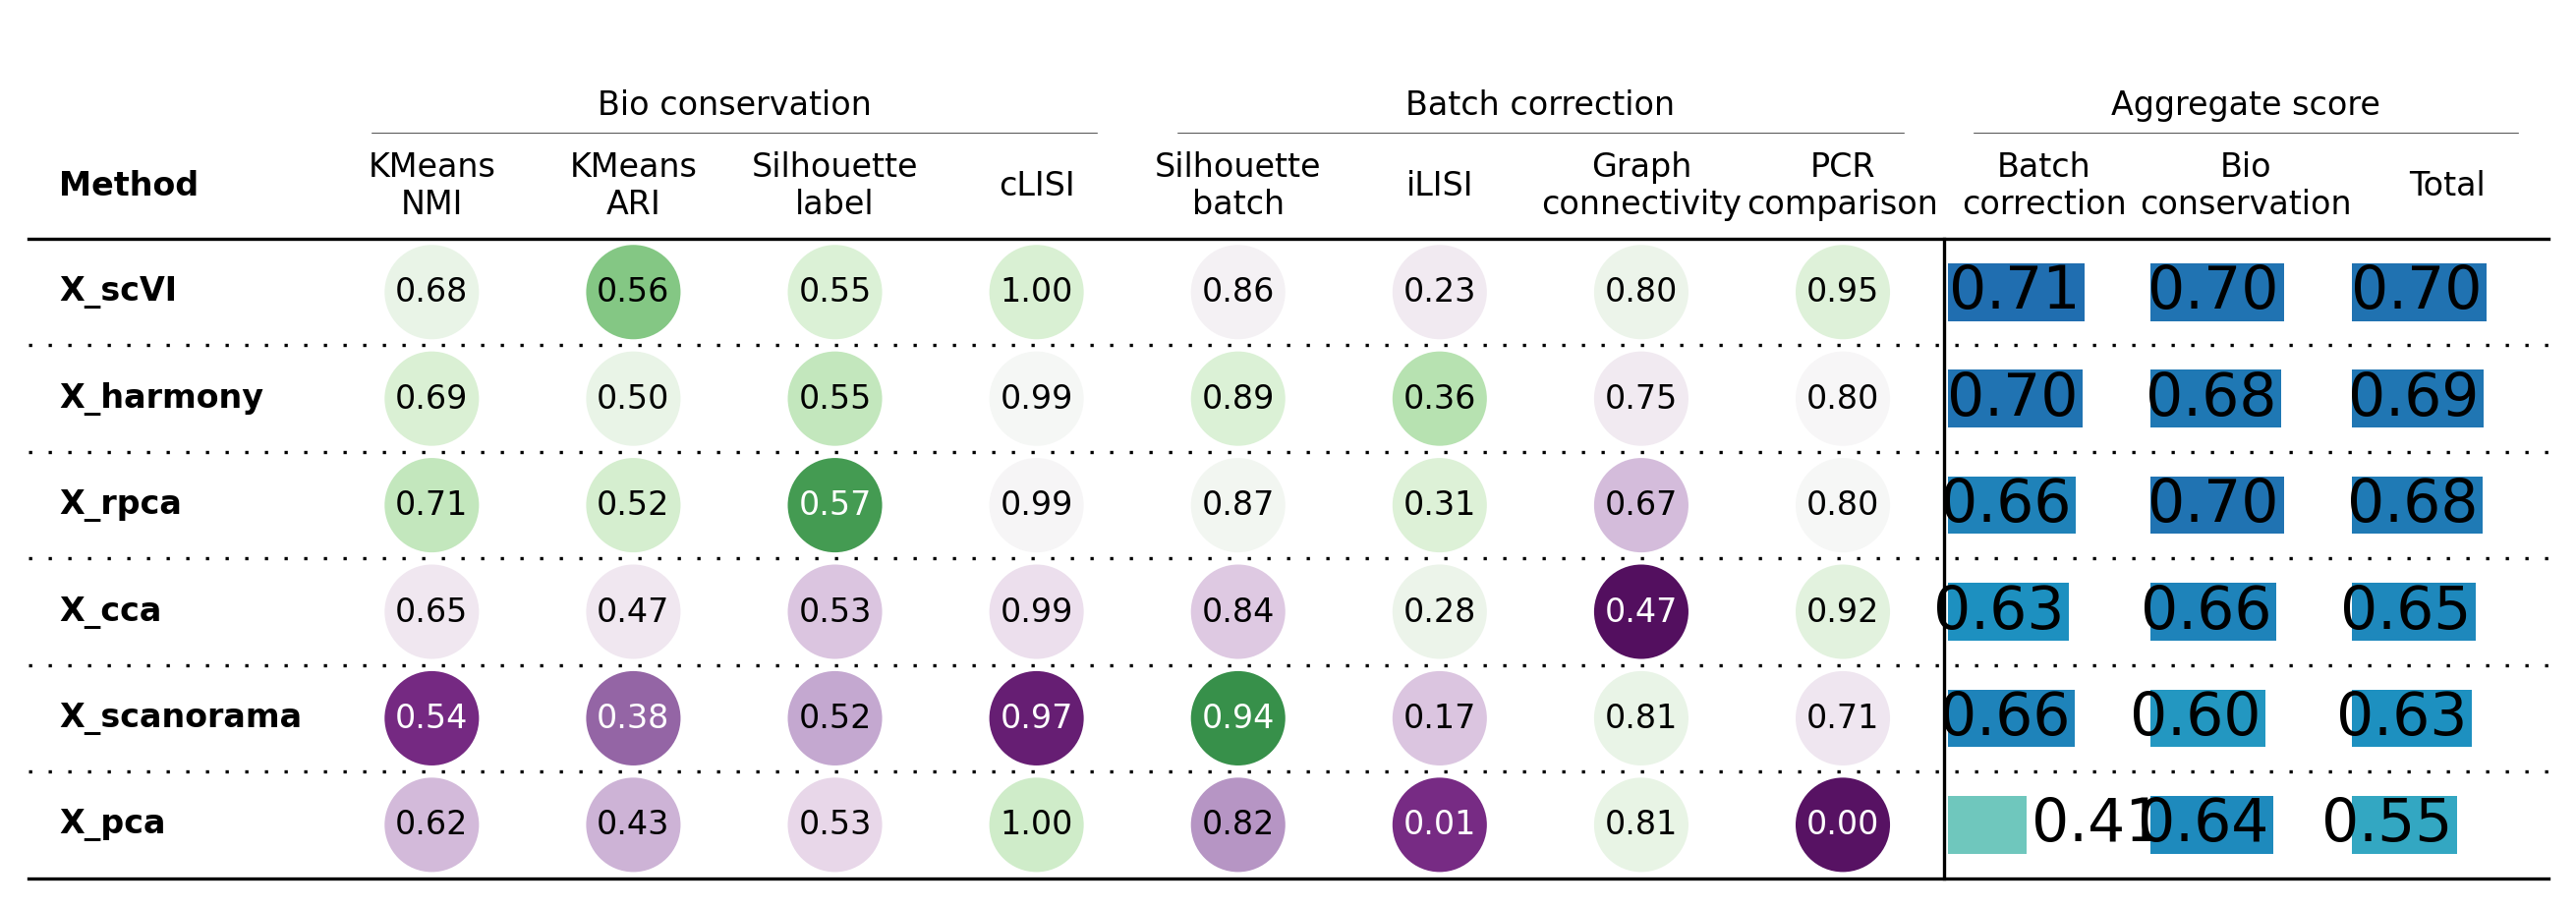

                   KMeans NMI        KMeans ARI  Silhouette label  \
Embedding                                                           
X_pca                0.615469          0.427731          0.531111   
X_scanorama          0.540014          0.380184          0.522819   
X_scVI               0.677746          0.563727          0.546733   
X_harmony            0.693527          0.498816          0.550714   
X_cca                 0.65032          0.468048          0.527981   
X_rpca               0.708729          0.518855          0.566943   
Metric Type  Bio conservation  Bio conservation  Bio conservation   

                        cLISI  Silhouette batch             iLISI  \
Embedding                                                           
X_pca                0.999344          0.819431          0.005869   
X_scanorama          0.968561          0.944919          0.172226   
X_scVI               0.998292          0.864953          0.229092   
X_harmony            0.993093    

In [7]:
joblib.dump(bm, '../Data/benchmark_score/benckmark_model_donors_batches.pkl')
# model = joblib.load('model.pkl')
bm.plot_results_table(min_max_scale=False, save_dir="../Analysis/")

df = bm.get_results(min_max_scale=False)

print(df)

df.to_csv("../Data/benchmark_score/benchmark_batch_donor_celltype_results.csv", index=True)

**`3.2 Benchmark the protocols`**

In [8]:
import joblib
import scib
from scib_metrics.benchmark import Benchmarker
from scib_metrics.benchmark import BioConservation, BatchCorrection

biocons = BioConservation(isolated_labels=False)
batchcor = BatchCorrection(kbet_per_label=False)
bm = Benchmarker(
    adata,
    batch_key="chemistry",
    label_key="final_annotation",
    embedding_obsm_keys=[
        "X_pca",
        "X_scanorama",
        "X_scVI",
        "X_harmony",
        "X_cca",
        "X_rpca"
    ],
    bio_conservation_metrics=biocons,
    batch_correction_metrics=batchcor,
    n_jobs=16
)

In [9]:
bm.benchmark()

Embeddings:  17%|█▋        | 1/6 [01:10<05:50, 70.04s/it]atch correction: pcr_comparison]
                                                                                         
Embeddings:  33%|███▎      | 2/6 [01:27<02:36, 39.07s/it]atch correction: pcr_comparison]
                                                                                         
Embeddings:  50%|█████     | 3/6 [01:41<01:23, 27.76s/it]atch correction: pcr_comparison]
                                                                                         
Embeddings:  67%|██████▋   | 4/6 [02:45<01:24, 42.13s/it]atch correction: pcr_comparison]
                                                                                         
Embeddings:  83%|████████▎ | 5/6 [03:57<00:52, 52.63s/it]atch correction: pcr_comparison]
                                                                                         
Embeddings: 100%|██████████| 6/6 [05:02<00:00, 50.36s/it]atch correction: pcr_comparison]

         

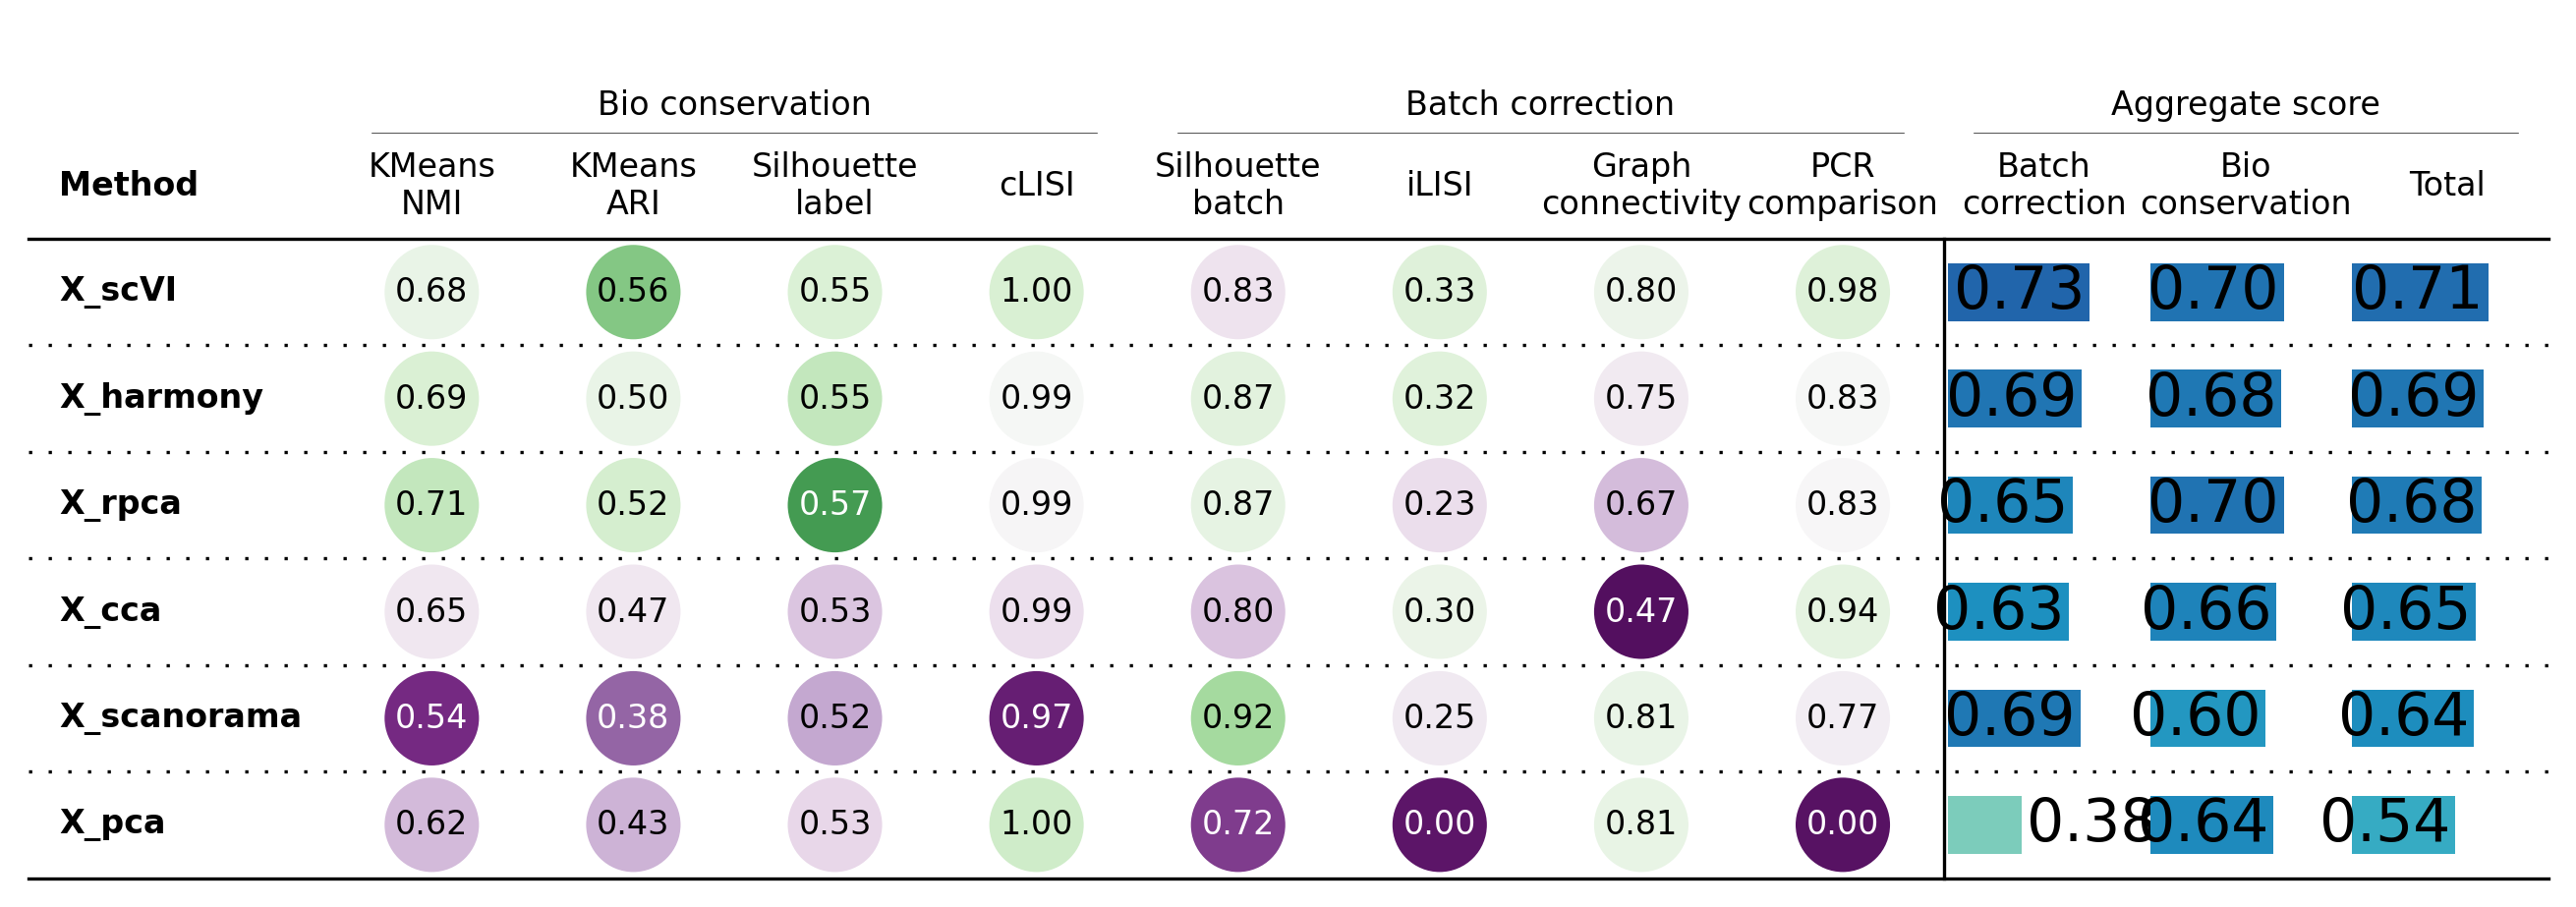

                   KMeans NMI        KMeans ARI  Silhouette label  \
Embedding                                                           
X_pca                0.615469          0.427731          0.531111   
X_scanorama          0.540014          0.380184          0.522819   
X_scVI               0.677746          0.563727          0.546733   
X_harmony            0.693527          0.498816          0.550714   
X_cca                 0.65032          0.468048          0.527981   
X_rpca               0.708729          0.518855          0.566943   
Metric Type  Bio conservation  Bio conservation  Bio conservation   

                        cLISI  Silhouette batch             iLISI  \
Embedding                                                           
X_pca                0.999344          0.717719               0.0   
X_scanorama          0.968561          0.920974          0.250467   
X_scVI               0.998292           0.82958          0.325726   
X_harmony            0.993093    

In [10]:
joblib.dump(bm, '../Data/benchmark_score/benckmark_model_protocols_batches.pkl')
# model = joblib.load('model.pkl')
bm.plot_results_table(min_max_scale=False,save_dir="../Analysis/")

df = bm.get_results(min_max_scale=False)

print(df)

df.to_csv("../Data/benchmark_score/benchmark_batch_protocols_celltype_results.csv", index=True)

**`3.3 Benchmark the cluster stability`**

**`Load Package`**

In [1]:
# load function
source('./Seurat_Function.R')
# load package
options(stringsAsFactors = F)
for(i in pg){suppressMessages(library(i, character.only = T))}
# set memery and core number
options(future.globals.maxSize = 20 * 1024^3) 
plan(multicore, workers = 12)

library(scclusteval)
library(tidyverse)
library(patchwork)
library(Seurat)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%()    masks IRanges::%within%()
✖ data.table::between()    masks dplyr::between()
✖ scales::col_factor()     masks readr::col_factor()
✖ IRanges::collapse()      masks dplyr::collapse()
✖ Biobase::combine()       masks BiocGenerics::combine(), dplyr::combine()
✖ matrixStats::count()     masks dplyr::count()
✖ IRanges::desc()          masks dplyr::desc()
✖ purrr::discard()         masks scales::discard()
✖ tidyr::expand()          masks S4Vectors::expand()
✖ dplyr::filter()          masks stats::filter()
✖ S4Vectors::first()       masks data.table::first(), dplyr::first()
✖ lubridate::hour()        masks data.table::hour()
✖ lubridate::isoweek()     masks data.table::isoweek()
✖ dplyr::lag

In [4]:
immune <- readRDS("../Data/raw_seurat/Immune_human_alldata_visualization_v5.rds")

In [5]:
immune

An object of class Seurat 
8128 features across 25507 samples within 1 assay 
Active assay: RNA (8128 features, 2000 variable features)
 21 layers present: counts.Oetjen_A, counts.Oetjen_P, counts.Oetjen_U, counts.Freytag, counts.10X, counts.Sun_sample1_CS, counts.Sun_sample2_KC, counts.Sun_sample3_TB, counts.Sun_sample4_TC, counts.Villani, data.Oetjen_A, data.Oetjen_P, data.Oetjen_U, data.Freytag, data.10X, data.Sun_sample1_CS, data.Sun_sample2_KC, data.Sun_sample3_TB, data.Sun_sample4_TC, data.Villani, scale.data
 14 dimensional reductions calculated: harmoney_umap, harmony, pca, pca_umap, scVI, scVI_umap, scaled.original.X_pca, scanorama, scanorama_umap, umap, cca, rpca, cca_umap, rpca_umap

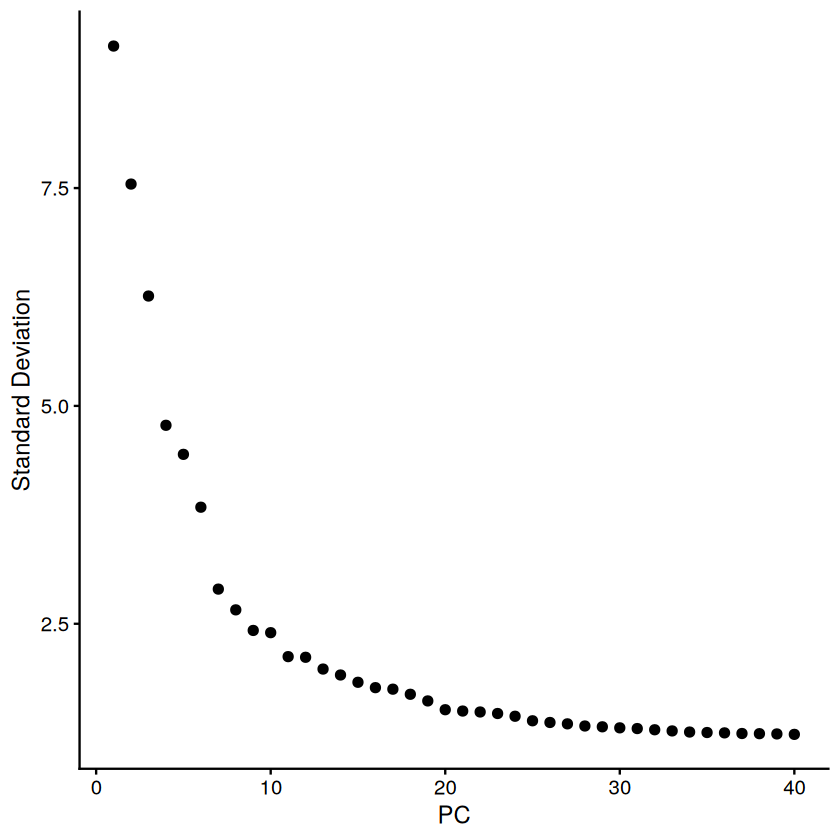

In [8]:
ElbowPlot(immune, ndims = 40)

**`Bootstrap to evaluate the cluster stability`**

In [56]:
BootstrapClusterStability <- function(seurat_obj, 
                                      reduction = "pca", 
                                      dims = 1:20,
                                      resolution = 0.8,
                                      k.param = 20,
                                      n_iter = 100,
                                      verbose = TRUE,
                                      seed = 123) {
  set.seed(seed)

  if (!reduction %in% names(seurat_obj@reductions)) {
    stop(paste0("Reduction '", reduction, "' not found in Seurat object"))
  }
  y <- t(Embeddings(seurat_obj, reduction)[, dims])
  all_cells <- colnames(seurat_obj)

  clusterFun <- function(y, k) {
    stats::kmeans(t(y), centers = k, iter.max = 100)$cluster
  }

  cluster <- clusterFun(y, k = k.param)
  names(cluster) <- all_cells

  mapJaccard <- function(y, cluster, new.y, new.cluster) {
    cluster_vec <- cluster[colnames(y)]
    m <- get.knnx(t(y), t(new.y), k = 1)$nn.index
    re.cluster <- cluster_vec[m]

    by.reclust <- split(seq_along(re.cluster), re.cluster)
    by.newclust <- split(seq_along(new.cluster), new.cluster)

    output <- numeric(length(by.reclust))
    names(output) <- names(by.reclust)

    for (X in names(by.reclust)) {
      current <- by.reclust[[X]]
      jaccards <- lapply(by.newclust, function(other) {
        length(intersect(current, other)) / length(union(current, other))
      })
      output[X] <- max(unlist(jaccards))
    }

    return(output)
  }

  # 并行 bootstrap
  result_list <- future_map(1:n_iter, function(i) {
    if (verbose) message("Bootstrap iteration ", i, "/", n_iter)
    sampled_cells <- sample(ncol(y), replace = TRUE)
    new.y <- y[, sampled_cells]
    new.cluster <- clusterFun(new.y, k = k.param)
    mapJaccard(y, cluster, new.y, new.cluster)
  }, .options = furrr_options(seed = TRUE))

  jaccard_df <- do.call(rbind, result_list)
  avg_jaccard <- colMeans(jaccard_df, na.rm = TRUE)

  return(list(
    jaccard_per_iter = jaccard_df,
    avg_jaccard = avg_jaccard,
    original_clusters = cluster
  ))
}


In [33]:
names(immune@reductions)
head(Embeddings(immune[["pca"]])[, 1:5])
head(Embeddings(immune[["scanorama"]])[, 1:5])
head(Embeddings(immune[["scVI"]])[, 1:5])
head(Embeddings(immune[["harmony"]])[, 1:5])
head(Embeddings(immune[["cca"]])[, 1:5])
head(Embeddings(immune[["rpca"]])[, 1:5])

[1] "harmoney_umap"         "harmony"               "pca"                  
 [4] "pca_umap"              "scVI"                  "scVI_umap"            
 [7] "scaled.original.X_pca" "scanorama"             "scanorama_umap"       
[10] "umap"                  "cca"                   "rpca"                 
[13] "cca_umap"              "rpca_umap"

,PC_1,PC_2,PC_3,PC_4,PC_5
AAACCTGCAGCGAACA-1-Oetjen_A,3.257913,6.8845820,1.3979899,-0.2203225,-3.198167
AAACCTGCATGTCCTC-1-Oetjen_A,-6.988053,0.8133385,-0.7210577,0.7071119,-4.096279
AAACCTGGTCGACTGC-1-Oetjen_A,5.761909,10.2892704,3.4961414,-0.5952868,-3.929490
AAACCTGGTCGCTTCT-1-Oetjen_A,2.164078,9.9657803,3.1275909,0.5478322,-5.165724
AAACCTGTCCCGACTT-1-Oetjen_A,-8.135880,0.1366612,-1.5486908,-1.4034711,-2.385454
AAACGGGAGGGCACTA-1-Oetjen_A,3.167608,10.6242590,1.8193432,-0.5161927,-2.861818


,scanorama_1,scanorama_2,scanorama_3,scanorama_4,scanorama_5
AAACCTGCAGCGAACA-1-Oetjen_A,0.20198923,0.0717001384,0.030694209,0.034315171,-0.078847550
AAACCTGCATGTCCTC-1-Oetjen_A,-0.32097329,-0.0007907553,-0.006250924,-0.004198359,-0.001283503
AAACCTGGTCGACTGC-1-Oetjen_A,-0.45870611,0.0950248531,0.038322342,0.101541240,-0.059368585
AAACCTGGTCGCTTCT-1-Oetjen_A,0.18368671,0.0484392815,0.187460026,-0.259078140,-0.064419312
AAACCTGTCCCGACTT-1-Oetjen_A,0.02453827,-0.2415072185,-0.223562677,-0.028538943,-0.161634273
AAACGGGAGGGCACTA-1-Oetjen_A,0.17164930,0.0626175163,0.125912094,-0.255329459,-0.122104605


,scVI_1,scVI_2,scVI_3,scVI_4,scVI_5
AAACCTGCAGCGAACA-1-Oetjen_A,-0.02594737,-0.008220891,0.2791954,0.06415191,-0.7318412
AAACCTGCATGTCCTC-1-Oetjen_A,0.04560965,0.025834654,-0.8308836,-0.02092852,0.6450690
AAACCTGGTCGACTGC-1-Oetjen_A,0.02898887,0.021882258,0.4472507,-0.02994874,0.1828634
AAACCTGGTCGCTTCT-1-Oetjen_A,-0.02128070,0.019902734,0.3700076,-0.04402448,0.4721063
AAACCTGTCCCGACTT-1-Oetjen_A,0.01356745,-0.033043660,0.3430952,0.14367178,1.0459756
AAACGGGAGGGCACTA-1-Oetjen_A,0.01930471,0.010932184,0.5344756,0.01073921,0.2686759


,harmony_1,harmony_2,harmony_3,harmony_4,harmony_5
AAACCTGCAGCGAACA-1-Oetjen_A,6.348130,5.4809159,-0.2323971,-0.4330720,-3.121571
AAACCTGCATGTCCTC-1-Oetjen_A,-7.248477,0.1969950,-1.6514742,0.4603010,-3.462238
AAACCTGGTCGACTGC-1-Oetjen_A,9.241184,9.1506996,1.4521715,-0.9023515,-3.382188
AAACCTGGTCGCTTCT-1-Oetjen_A,5.690280,9.0356227,1.0738638,0.2524843,-4.633384
AAACCTGTCCCGACTT-1-Oetjen_A,-8.374546,-0.4703581,-2.4869790,-1.5859496,-1.813001
AAACGGGAGGGCACTA-1-Oetjen_A,6.655384,9.5541926,-0.2259989,-0.8145943,-2.321907


,cca_1,cca_2,cca_3,cca_4,cca_5
AAACCTGCAGCGAACA-1-Oetjen_A,8.632174,6.363456,0.7133228,-1.187085,2.4162316
AAACCTGCATGTCCTC-1-Oetjen_A,-6.218458,-2.531895,-3.6682549,-1.444837,2.0447510
AAACCTGGTCGACTGC-1-Oetjen_A,10.699311,10.922277,1.8534959,-1.979315,1.4563488
AAACCTGGTCGCTTCT-1-Oetjen_A,8.419130,11.539304,2.2940788,-1.309020,0.3251698
AAACCTGTCCCGACTT-1-Oetjen_A,-5.391840,-3.310340,-3.4242433,-3.330959,3.8715770
AAACGGGAGGGCACTA-1-Oetjen_A,8.375521,10.914474,1.1014910,-1.805156,1.7745834


,rpca_1,rpca_2,rpca_3,rpca_4,rpca_5
AAACCTGCAGCGAACA-1-Oetjen_A,8.711391,7.186312,-0.01948869,-1.5326646,3.0438280
AAACCTGCATGTCCTC-1-Oetjen_A,-6.017778,-2.853574,-3.54932497,-1.6555008,1.8341952
AAACCTGGTCGACTGC-1-Oetjen_A,9.458196,10.413800,2.23630663,-1.3066718,0.6270147
AAACCTGGTCGCTTCT-1-Oetjen_A,7.083804,11.062961,2.10655565,-0.6041411,-0.7320994
AAACCTGTCCCGACTT-1-Oetjen_A,-6.469668,-3.920357,-3.98825644,-3.3357288,4.0433678
AAACGGGAGGGCACTA-1-Oetjen_A,7.653821,11.237129,0.83958209,-1.3580657,1.4512373


In [47]:
library(Seurat)
library(FNN)
library(future)
library(furrr)
library(dplyr)
plan(multisession, workers = 24)

pca_cluster_stability <- BootstrapClusterStability(
  seurat_obj = immune,
  reduction = "pca",
  dims = 1:20,
  k.param = 20,
  n_iter = 100
)

head(pca_cluster_stability$avg_jaccard)

Bootstrap iteration 1/100

Bootstrap iteration 2/100

Bootstrap iteration 3/100

Bootstrap iteration 4/100

Bootstrap iteration 5/100

Bootstrap iteration 6/100

Bootstrap iteration 7/100

Bootstrap iteration 8/100

Bootstrap iteration 9/100

Bootstrap iteration 10/100

Bootstrap iteration 11/100

Bootstrap iteration 12/100

Bootstrap iteration 13/100

Bootstrap iteration 14/100

Bootstrap iteration 15/100

Bootstrap iteration 16/100

Bootstrap iteration 17/100

Bootstrap iteration 18/100

Bootstrap iteration 19/100

Bootstrap iteration 20/100

Bootstrap iteration 21/100

Bootstrap iteration 22/100

Bootstrap iteration 23/100

Bootstrap iteration 24/100

Bootstrap iteration 25/100

Bootstrap iteration 26/100

Bootstrap iteration 27/100

Bootstrap iteration 28/100

Bootstrap iteration 29/100

Bootstrap iteration 30/100

Bootstrap iteration 31/100

Bootstrap iteration 32/100

Bootstrap iteration 33/100

Bootstrap iteration 34/100

Bootstrap iteration 35/100

Bootstrap iteration 36/100

B

1         2         3         4         5         6 
0.7850874 0.4760323 0.9087081 0.4633705 0.2048579 0.7775685

In [50]:
saveRDS(pca_cluster_stability, file = "~/shenyu/CMML3/ICA2/Data/benchmark_score/pca_cluster_stability.rds")

In [51]:
library(Seurat)
library(FNN)
library(future)
library(furrr)
library(dplyr)
plan(multicore, workers = 24)

In [58]:
scanorama_cluster_stability <- BootstrapClusterStability(
  seurat_obj = immune,
  reduction = "scanorama",
  dims = 1:20,
  k.param = 20,
  n_iter = 100
)

head(scanorama_cluster_stability$avg_jaccard)

Bootstrap iteration 1/100

Bootstrap iteration 2/100

Bootstrap iteration 3/100

Bootstrap iteration 4/100

Bootstrap iteration 5/100

Bootstrap iteration 6/100

Bootstrap iteration 7/100

Bootstrap iteration 8/100

Bootstrap iteration 9/100

Bootstrap iteration 10/100

Bootstrap iteration 11/100

Bootstrap iteration 12/100

Bootstrap iteration 13/100

Bootstrap iteration 14/100

Bootstrap iteration 15/100

Bootstrap iteration 16/100

Bootstrap iteration 17/100

Bootstrap iteration 18/100

Bootstrap iteration 19/100

Bootstrap iteration 20/100

Bootstrap iteration 21/100

Bootstrap iteration 22/100

Bootstrap iteration 23/100

Bootstrap iteration 24/100

Bootstrap iteration 25/100

Bootstrap iteration 26/100

Bootstrap iteration 27/100

Bootstrap iteration 28/100

Bootstrap iteration 29/100

Bootstrap iteration 30/100

Bootstrap iteration 31/100

Bootstrap iteration 32/100

Bootstrap iteration 33/100

Bootstrap iteration 34/100

Bootstrap iteration 35/100

Bootstrap iteration 36/100

B

1         2         3         4         5         6 
0.7952990 0.7580441 0.5772906 0.9187640 0.7591282 0.7438233

In [59]:
saveRDS(scanorama_cluster_stability, file = "~/shenyu/CMML3/ICA2/Data/benchmark_score/scanorama_cluster_stability.rds")

In [60]:
scVI_cluster_stability <- BootstrapClusterStability(
  seurat_obj = immune,
  reduction = "scVI",
  dims = 1:20,
  k.param = 20,
  n_iter = 100
)

head(scVI_cluster_stability$avg_jaccard)

Bootstrap iteration 1/100

Bootstrap iteration 2/100

Bootstrap iteration 3/100

Bootstrap iteration 4/100

Bootstrap iteration 5/100

Bootstrap iteration 6/100

Bootstrap iteration 7/100

Bootstrap iteration 8/100

Bootstrap iteration 9/100

Bootstrap iteration 10/100

Bootstrap iteration 11/100

Bootstrap iteration 12/100

Bootstrap iteration 13/100

Bootstrap iteration 14/100

Bootstrap iteration 15/100

Bootstrap iteration 16/100

Bootstrap iteration 17/100

Bootstrap iteration 18/100

Bootstrap iteration 19/100

Bootstrap iteration 20/100

Bootstrap iteration 21/100

Bootstrap iteration 22/100

Bootstrap iteration 23/100

Bootstrap iteration 24/100

Bootstrap iteration 25/100

Bootstrap iteration 26/100

Bootstrap iteration 27/100

Bootstrap iteration 28/100

Bootstrap iteration 29/100

Bootstrap iteration 30/100

Bootstrap iteration 31/100

Bootstrap iteration 32/100

Bootstrap iteration 33/100

Bootstrap iteration 34/100

Bootstrap iteration 35/100

Bootstrap iteration 36/100

B

1         2         3         4         5         6 
0.4702920 0.6819374 0.1849528 0.6668882 0.6777399 0.8149432

In [61]:
saveRDS(scVI_cluster_stability, file = "~/shenyu/CMML3/ICA2/Data/benchmark_score/scVI_cluster_stability.rds")

In [62]:
harmony_cluster_stability <- BootstrapClusterStability(
  seurat_obj = immune,
  reduction = "harmony",
  dims = 1:20,
  k.param = 20,
  n_iter = 100
)

head(harmony_cluster_stability$avg_jaccard)

Bootstrap iteration 1/100

Bootstrap iteration 2/100

Bootstrap iteration 3/100

Bootstrap iteration 4/100

Bootstrap iteration 5/100

Bootstrap iteration 6/100

Bootstrap iteration 7/100

Bootstrap iteration 8/100

Bootstrap iteration 9/100

Bootstrap iteration 10/100

Bootstrap iteration 11/100

Bootstrap iteration 12/100

Bootstrap iteration 13/100

Bootstrap iteration 14/100

Bootstrap iteration 15/100

Bootstrap iteration 16/100

Bootstrap iteration 17/100

Bootstrap iteration 18/100

Bootstrap iteration 19/100

Bootstrap iteration 20/100

Bootstrap iteration 21/100

Bootstrap iteration 22/100

Bootstrap iteration 23/100

Bootstrap iteration 24/100

Bootstrap iteration 25/100

Bootstrap iteration 26/100

Bootstrap iteration 27/100

Bootstrap iteration 28/100

Bootstrap iteration 29/100

Bootstrap iteration 30/100

Bootstrap iteration 31/100

Bootstrap iteration 32/100

Bootstrap iteration 33/100

Bootstrap iteration 34/100

Bootstrap iteration 35/100

Bootstrap iteration 36/100

B

1         2         3         4         5         6 
0.6439603 0.7506725 0.9875353 0.6733380 0.5849486 0.8531473

In [63]:
saveRDS(harmony_cluster_stability, file = "~/shenyu/CMML3/ICA2/Data/benchmark_score/harmony_cluster_stability.rds")

In [64]:
cca_cluster_stability <- BootstrapClusterStability(
  seurat_obj = immune,
  reduction = "cca",
  dims = 1:20,
  k.param = 20,
  n_iter = 100
)

head(cca_cluster_stability$avg_jaccard)

Bootstrap iteration 1/100

Bootstrap iteration 2/100

Bootstrap iteration 3/100

Bootstrap iteration 4/100

Bootstrap iteration 5/100

Bootstrap iteration 6/100

Bootstrap iteration 7/100

Bootstrap iteration 8/100

Bootstrap iteration 9/100

Bootstrap iteration 10/100

Bootstrap iteration 11/100

Bootstrap iteration 12/100

Bootstrap iteration 13/100

Bootstrap iteration 14/100

Bootstrap iteration 15/100

Bootstrap iteration 16/100

Bootstrap iteration 17/100

Bootstrap iteration 18/100

Bootstrap iteration 19/100

Bootstrap iteration 20/100

Bootstrap iteration 21/100

Bootstrap iteration 22/100

Bootstrap iteration 23/100

Bootstrap iteration 24/100

Bootstrap iteration 25/100

Bootstrap iteration 26/100

Bootstrap iteration 27/100

Bootstrap iteration 28/100

Bootstrap iteration 29/100

Bootstrap iteration 30/100

Bootstrap iteration 31/100

Bootstrap iteration 32/100

Bootstrap iteration 33/100

Bootstrap iteration 34/100

Bootstrap iteration 35/100

Bootstrap iteration 36/100

B

1         2         3         4         5         6 
0.6447713 0.7010408 0.9846661 0.4064468 0.5869963 0.4700488

In [65]:
saveRDS(cca_cluster_stability, file = "~/shenyu/CMML3/ICA2/Data/benchmark_score/cca_cluster_stability.rds")

In [66]:
rpca_cluster_stability <- BootstrapClusterStability(
  seurat_obj = immune,
  reduction = "rpca",
  dims = 1:20,
  k.param = 20,
  n_iter = 100
)

head(rpca_cluster_stability$avg_jaccard)

Bootstrap iteration 1/100

Bootstrap iteration 2/100

Bootstrap iteration 3/100

Bootstrap iteration 4/100

Bootstrap iteration 5/100

Bootstrap iteration 6/100

Bootstrap iteration 7/100

Bootstrap iteration 8/100

Bootstrap iteration 9/100

Bootstrap iteration 10/100

Bootstrap iteration 11/100

Bootstrap iteration 12/100

Bootstrap iteration 13/100

Bootstrap iteration 14/100

Bootstrap iteration 15/100

Bootstrap iteration 16/100

Bootstrap iteration 17/100

Bootstrap iteration 18/100

Bootstrap iteration 19/100

Bootstrap iteration 20/100

Bootstrap iteration 21/100

Bootstrap iteration 22/100

Bootstrap iteration 23/100

Bootstrap iteration 24/100

Bootstrap iteration 25/100

Bootstrap iteration 26/100

Bootstrap iteration 27/100

Bootstrap iteration 28/100

Bootstrap iteration 29/100

Bootstrap iteration 30/100

Bootstrap iteration 31/100

Bootstrap iteration 32/100

Bootstrap iteration 33/100

Bootstrap iteration 34/100

Bootstrap iteration 35/100

Bootstrap iteration 36/100

B

1         2         3         4         5         6 
0.6142748 0.6493208 0.9380490 0.9209975 0.8951407 0.8333036

In [67]:
saveRDS(rpca_cluster_stability, file = "~/shenyu/CMML3/ICA2/Data/benchmark_score/rpca_cluster_stability.rds")

**`Integrate the percentage of stable clusters with a stability value larger than 0.6`**

In [3]:
calc_stable_cluster_percentage <- function(rds_path, threshold = 0.6) {
  result <- readRDS(rds_path)
  avg_jaccard <- result$avg_jaccard
  stable_pct <- mean(avg_jaccard > threshold)
  return(stable_pct)
}

In [75]:
methods <- c("pca", "scanorama", "scVI","harmony","cca","rpca")
file_paths <- paste0("../Data/benchmark_score/",methods, "_cluster_stability.rds")

stable_percentages <- sapply(file_paths, calc_stable_cluster_percentage)

data.frame(Method = methods, Stable_Cluster_Percentage = stable_percentages)

,Method,Stable_Cluster_Percentage
,<chr>,<dbl>
../Data/benchmark_score/pca_cluster_stability.rds,pca,0.75
../Data/benchmark_score/scanorama_cluster_stability.rds,scanorama,0.80
../Data/benchmark_score/scVI_cluster_stability.rds,scVI,0.75
../Data/benchmark_score/harmony_cluster_stability.rds,harmony,0.70
../Data/benchmark_score/cca_cluster_stability.rds,cca,0.70
../Data/benchmark_score/rpca_cluster_stability.rds,rpca,0.80


In [4]:
methods <- c("pca", "scanorama", "scVI","harmony","cca","rpca")
file_paths <- paste0("../Data/benchmark_score/",methods, "_cluster_stability.rds")

stable_percentages <- sapply(file_paths, calc_stable_cluster_percentage)


In [35]:
library(dplyr)

process_cluster_data_counts <- function(rds_path, method) {
  result <- readRDS(rds_path)
  jaccard_mat <- result$jaccard_per_iter  # [iter x clusters]
  avg_jaccard <- result$avg_jaccard
  
  cluster_ids <- seq_along(avg_jaccard)
  
  data <- lapply(cluster_ids, function(i) {
    values <- jaccard_mat[, i]
    
    count_low  <- sum(values < 0.6)
    count_mid  <- sum(values >= 0.6 & values < 0.8)
    count_high <- sum(values >= 0.8)
    
    data.frame(
      Method = method,
      Cluster = paste0("Cluster_", i),
      Range = c("0-0.6", "0.6-0.8", "0.8-1"),
      Count = c(count_low, count_mid, count_high),
      Avg_Jaccard = avg_jaccard[i],
      Stability = case_when(
        avg_jaccard[i] < 0.6 ~ "Unstable",
        avg_jaccard[i] >= 0.6 & avg_jaccard[i] < 0.8 ~ "Middle Stable",
        avg_jaccard[i] >= 0.8 ~ "Highly Stable"
      )
    )
  })
  
  do.call(rbind, data)
}


In [55]:
library(tidyverse)
library(viridis)

plot_beautiful_circular_bar <- function(df, method) {
  # Step 1: 过滤方法，准备结构
  filter_data <- df %>%
    filter(Method == method)

  data <- data.frame(
    individual = filter_data$Cluster,
    group = factor(filter_data$Stability, levels = c("Unstable", "Middle Stable", "Highly Stable")),
    observation = filter_data$Range,
    value = filter_data$Count
  )

  # Step 2: 加空白 bar 美化分组
  empty_bar <- 2
  nObsType <- nlevels(factor(data$observation))
  to_add <- data.frame(matrix(NA, empty_bar * nlevels(data$group) * nObsType, ncol(data)))
  colnames(to_add) <- colnames(data)
  to_add$group <- rep(levels(data$group), each = empty_bar * nObsType)
  data <- rbind(data, to_add)

  # Step 3: 分配 id
  data <- data %>%
    arrange(group, individual) %>%
    mutate(id = rep(seq(1, nrow(.) / nObsType), each = nObsType))

  # Step 4: 标签位置计算
  label_data <- data %>%
    group_by(id, individual) %>%
    summarize(tot = sum(value, na.rm = TRUE), .groups = "drop")

  number_of_bar <- nrow(label_data)
  angle <- 90 - 360 * (label_data$id - 0.5) / number_of_bar
  label_data$hjust <- ifelse(angle < -90, 1, 0)
  label_data$angle <- ifelse(angle < -90, angle + 180, angle)

  # Step 5: 分组信息 baseline
  base_data <- data %>%
    group_by(group) %>%
    summarize(start = min(id), end = max(id) - empty_bar, .groups = "drop") %>%
    rowwise() %>%
    mutate(title = mean(c(start, end))) %>%
      mutate(y_pos = case_when(
        group == "Unstable" ~ -15,
        group == "Middle Stable" ~ -22,
        group == "Highly Stable" ~ -18
      ))

  # Step 6: 网格线
  grid_data <- base_data
  grid_data$end <- grid_data$end[c(nrow(grid_data), 1:(nrow(grid_data) - 1))] + 1
  grid_data$start <- grid_data$start - 1
  grid_data <- grid_data[-1, ]

  # Step 7: 画图
    
  p <- ggplot(data) +
    geom_bar(aes(x = as.factor(id), y = value, fill = observation),
             stat = "identity", alpha = 0.85) +
    scale_fill_viridis(discrete = TRUE, name = "Jaccard Range") +
    
    # 网格线
    geom_segment(data = grid_data, aes(x = end, y = 0, xend = start, yend = 0),
                 colour = "grey", alpha = 1, linewidth = 0.3, inherit.aes = FALSE) +
    geom_segment(data = grid_data, aes(x = end, y = 25, xend = start, yend = 25),
                 colour = "grey", alpha = 1, linewidth = 0.3, inherit.aes = FALSE) +
    geom_segment(data = grid_data, aes(x = end, y = 50, xend = start, yend = 50),
                 colour = "grey", alpha = 1, linewidth = 0.3, inherit.aes = FALSE) +
    geom_segment(data = grid_data, aes(x = end, y = 75, xend = start, yend = 75),
                 colour = "grey", alpha = 1, linewidth = 0.3, inherit.aes = FALSE) +

    annotate("text", x = rep(max(data$id), 4), y = c(0, 25, 50, 75),
             label = c("0", "25", "50", "75"), color = "black", size = 6,
             angle = 0, fontface = "bold", hjust = 1) +

    ylim(-75, max(label_data$tot, na.rm = TRUE) + 10) +
    theme_minimal() +
    theme(
      legend.position = "bottom",
      axis.text = element_blank(),
      axis.title = element_blank(),
      panel.grid = element_blank(),
      plot.margin = unit(rep(-1, 4), "cm")
    ) +
    coord_polar() +

    # Cluster 标签
    geom_text(data = label_data,
              aes(x = id, y = tot + 4, label = individual, hjust = hjust),
              color = "black", fontface = "bold", alpha = 0.7, size = 6,
              angle = label_data$angle, inherit.aes = FALSE) +

    # 分组基线
    geom_segment(data = base_data,
                 aes(x = start, y = -5, xend = end, yend = -5),
                 colour = "black", alpha = 0.8, size = 0.6, inherit.aes = FALSE) +
    geom_text(data = base_data,
              aes(x = title, y = y_pos, label = group),
              hjust = 0.5, colour = "black", alpha = 0.8, size = 6,
              fontface = "bold", inherit.aes = FALSE) +

    ggtitle(paste("Beautiful Circular Cluster Stability -", method))

  return(p)
}


Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names w

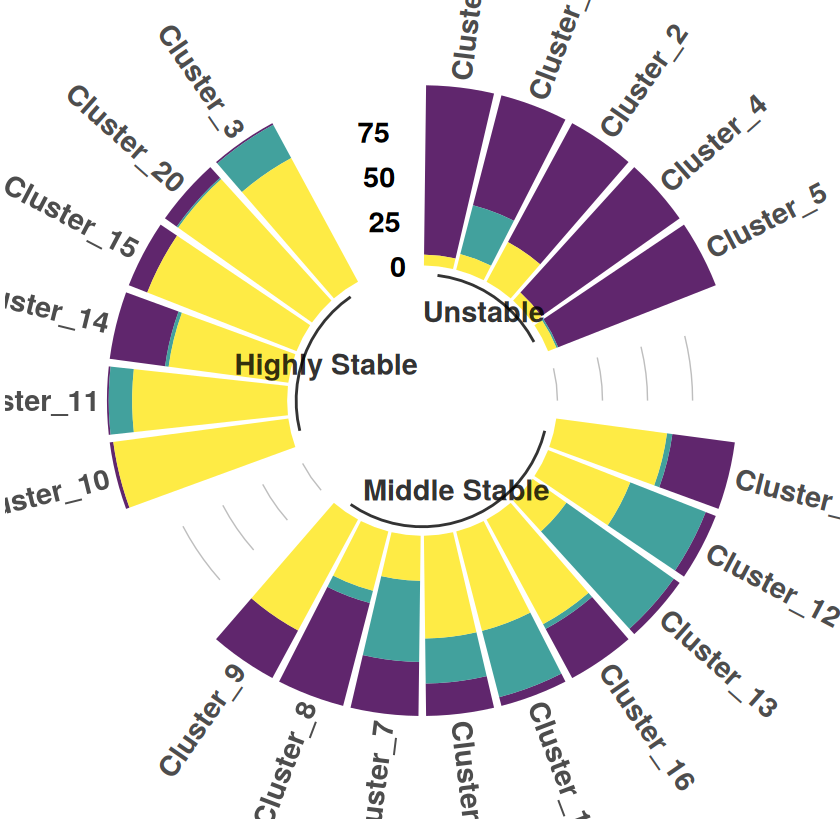

In [58]:
pca_data <- process_cluster_data_counts("../Data/benchmark_score/pca_cluster_stability.rds", "pca")
p <- plot_beautiful_circular_bar(pca_data, method = "pca")
print(p)
ggsave("../Analysis/pca_cluster_stability_circular.pdf", p, width = 12, height = 12)

In [59]:
methods <- c("pca", "scanorama", "scVI", "harmony", "cca", "rpca")

for (method in methods) {
  rds_path <- paste0("../Data/benchmark_score/", method, "_cluster_stability.rds")
  method_data <- process_cluster_data_counts(rds_path, method)
  p <- plot_beautiful_circular_bar(method_data, method = method)
  out_path <- paste0("../Analysis/", method, "_cluster_stability_circular.pdf")
  ggsave(out_path, plot = p, width = 12, height = 12)
  
  cat("Saved plot for", method, "→", out_path, "\n")
}


Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names w

Saved plot for pca → ../Analysis/pca_cluster_stability_circular.pdf 


Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names w

Saved plot for scanorama → ../Analysis/scanorama_cluster_stability_circular.pdf 


Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names w

Saved plot for scVI → ../Analysis/scVI_cluster_stability_circular.pdf 


Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names w

Saved plot for harmony → ../Analysis/harmony_cluster_stability_circular.pdf 


Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names w

Saved plot for cca → ../Analysis/cca_cluster_stability_circular.pdf 


Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names were found from a short variable and have been discarded”
Warning message in data.frame(Method = method, Cluster = paste0("Cluster_", i), :
“row names w

Saved plot for rpca → ../Analysis/rpca_cluster_stability_circular.pdf 
